## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [3]:
# Question 1.1
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


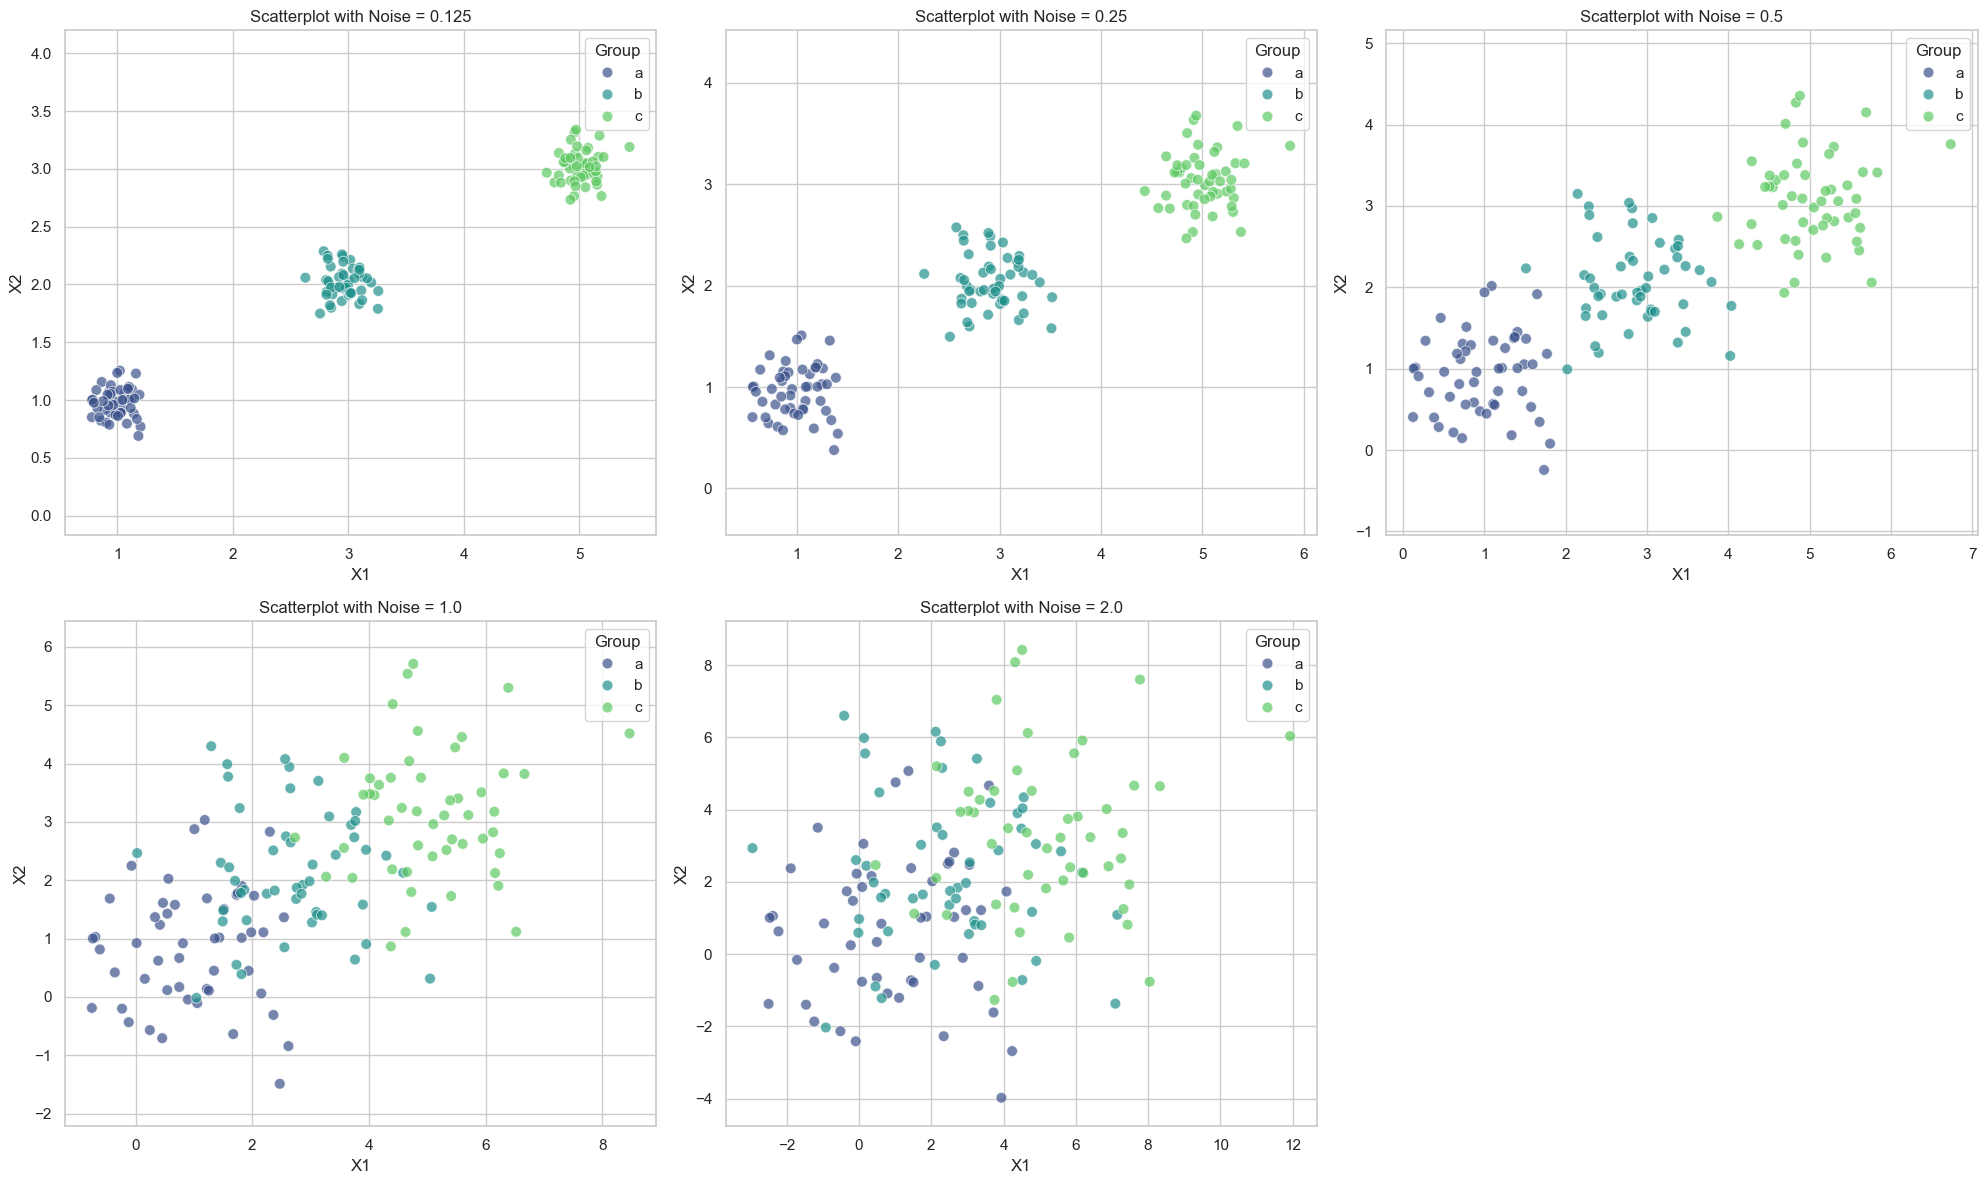

Cluster Analysis:

Noise level: 0.125
Average within-cluster std: 0.129
Average between-cluster distance: 3.001
Separation ratio (between/within): 23.240

Noise level: 0.25
Average within-cluster std: 0.258
Average between-cluster distance: 3.022
Separation ratio (between/within): 11.699

Noise level: 0.5
Average within-cluster std: 0.517
Average between-cluster distance: 3.064
Separation ratio (between/within): 5.931

Noise level: 1.0
Average within-cluster std: 1.033
Average between-cluster distance: 3.154
Separation ratio (between/within): 3.052

Noise level: 2.0
Average within-cluster std: 2.066
Average between-cluster distance: 3.355
Separation ratio (between/within): 1.624


In [4]:
# Question 1.2
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# Create subplots for each dataset
datasets = [
    (df0_125, '0.125', 1),
    (df0_25, '0.25', 2),
    (df0_5, '0.5', 3),
    (df1_0, '1.0', 4),
    (df2_0, '2.0', 5)
]

for i, (df, noise_level, pos) in enumerate(datasets):
    plt.subplot(2, 3, pos)
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', palette='viridis', s=60, alpha=0.7)
    plt.title(f'Scatterplot with Noise = {noise_level}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(title='Group')
    plt.axis('equal')

plt.tight_layout()
plt.show()

# Additional analysis: Calculate within-cluster and between-cluster distances
print("Cluster Analysis:")
print("=" * 50)

for df, noise_level in [(df0_125, '0.125'), (df0_25, '0.25'), (df0_5, '0.5'), (df1_0, '1.0'), (df2_0, '2.0')]:
    print(f"\nNoise level: {noise_level}")
    
    # Calculate mean positions of each cluster
    cluster_means = df.groupby('group')[['x1', 'x2']].mean()
    
    # Calculate within-cluster standard deviation (average)
    within_cluster_std = df.groupby('group')[['x1', 'x2']].std().mean().mean()
    
    # Calculate distances between cluster centers
    distances = []
    groups = ['a', 'b', 'c']
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            dist = np.sqrt(((cluster_means.loc[groups[i]] - cluster_means.loc[groups[j]])**2).sum())
            distances.append(dist)
    
    avg_between_distance = np.mean(distances)
    
    print(f"Average within-cluster std: {within_cluster_std:.3f}")
    print(f"Average between-cluster distance: {avg_between_distance:.3f}")
    print(f"Separation ratio (between/within): {avg_between_distance/within_cluster_std:.3f}")


Question 1.2

As the `noise` goes up from 0.125 to 2.0, the visual distinctness of clusters decreases dramatically. At low noise levels (≤0.25), clusters are clearly separated and easily identifiable. At moderate noise (0.5), clusters become fuzzy but still distinguishable. At high noise levels (≥1.0), clusters lose their distinctness and blend together, making visual identification difficult or impossible.

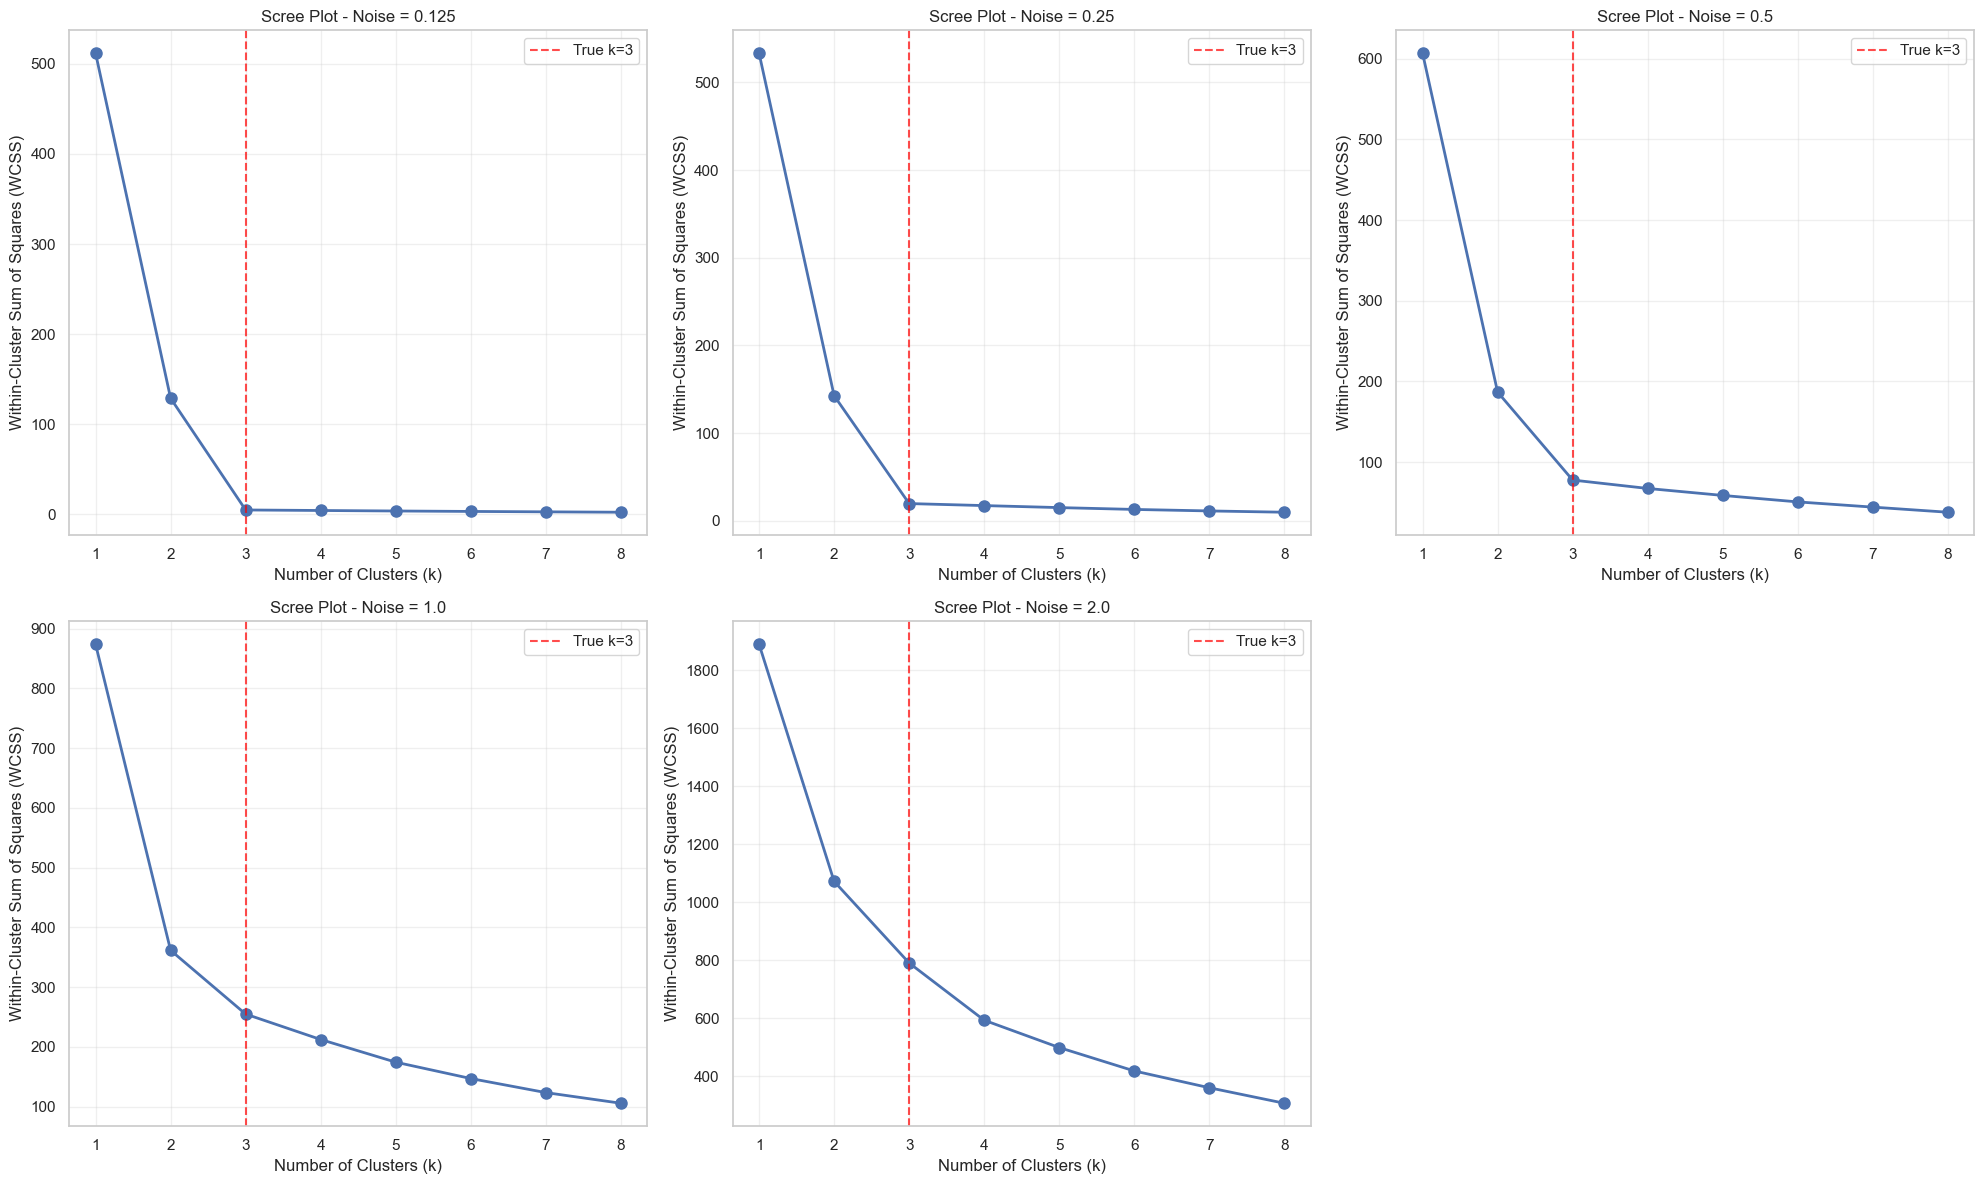

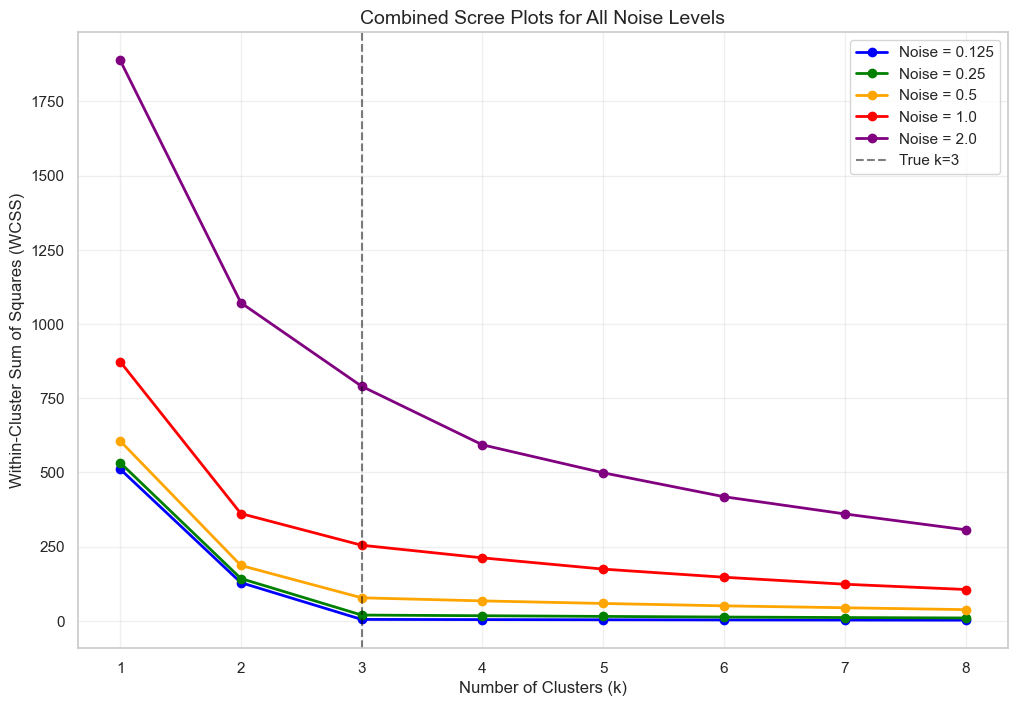

Elbow Analysis:

Noise level: 0.125
WCSS values: ['511.6', '128.9', '4.9', '4.3', '3.8', '3.3', '2.8', '2.4']
Drop from k=2 to k=3: 96.2%
Drop from k=3 to k=4: 11.8%
Elbow clarity: Strong

Noise level: 0.25
WCSS values: ['533.3', '142.7', '19.7', '17.3', '15.1', '13.0', '11.3', '9.8']
Drop from k=2 to k=3: 86.2%
Drop from k=3 to k=4: 11.7%
Elbow clarity: Strong

Noise level: 0.5
WCSS values: ['606.6', '186.8', '77.8', '67.4', '58.7', '50.7', '44.2', '37.9']
Drop from k=2 to k=3: 58.4%
Drop from k=3 to k=4: 13.4%
Elbow clarity: Strong

Noise level: 1.0
WCSS values: ['873.7', '361.6', '254.9', '212.4', '174.5', '147.1', '123.6', '105.7']
Drop from k=2 to k=3: 29.5%
Drop from k=3 to k=4: 16.7%
Elbow clarity: Moderate

Noise level: 2.0
WCSS values: ['1889.2', '1071.8', '790.5', '593.2', '499.0', '418.3', '360.4', '307.0']
Drop from k=2 to k=3: 26.2%
Drop from k=3 to k=4: 25.0%
Elbow clarity: Moderate

Silhouette Scores for k=3:
Noise 0.125: Silhouette Score = 0.896
Noise 0.25: Silhouette S

In [5]:
# Question 1.3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate within-cluster sum of squares for k-means
def calculate_wcss(data, max_k=8):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Prepare the data (excluding group labels for clustering)
datasets = [
    (df0_125[['x1', 'x2']], '0.125'),
    (df0_25[['x1', 'x2']], '0.25'), 
    (df0_5[['x1', 'x2']], '0.5'),
    (df1_0[['x1', 'x2']], '1.0'),
    (df2_0[['x1', 'x2']], '2.0')
]

# Create individual scree plots
plt.figure(figsize=(20, 12))

for i, (data, noise_level) in enumerate(datasets):
    wcss = calculate_wcss(data)
    
    plt.subplot(2, 3, i+1)
    plt.plot(range(1, len(wcss) + 1), wcss, 'bo-', linewidth=2, markersize=8)
    plt.title(f'Scree Plot - Noise = {noise_level}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.grid(True, alpha=0.3)
    
    # Add elbow at k=3 for reference
    if len(wcss) >= 3:
        plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='True k=3')
        plt.legend()

plt.tight_layout()
plt.show()

# Create combined scree plot on single canvas
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'orange', 'red', 'purple']
for i, (data, noise_level) in enumerate(datasets):
    wcss = calculate_wcss(data)
    plt.plot(range(1, len(wcss) + 1), wcss, 'o-', color=colors[i], 
             linewidth=2, markersize=6, label=f'Noise = {noise_level}')

plt.title('Combined Scree Plots for All Noise Levels', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.axvline(x=3, color='black', linestyle='--', alpha=0.5, label='True k=3')
plt.legend()
plt.show()

# Quantitative analysis of elbow strength
print("Elbow Analysis:")
print("=" * 50)

for data, noise_level in datasets:
    wcss = calculate_wcss(data)
    
    # Calculate the "elbow strength" as the percentage drop from k=2 to k=3
    if len(wcss) >= 3:
        drop_2_to_3 = (wcss[1] - wcss[2]) / wcss[1] * 100
        drop_3_to_4 = (wcss[2] - wcss[3]) / wcss[2] * 100
        elbow_strength = drop_2_to_3 - drop_2_to_3  # Relative improvement
        
        print(f"\nNoise level: {noise_level}")
        print(f"WCSS values: {[f'{x:.1f}' for x in wcss]}")
        print(f"Drop from k=2 to k=3: {drop_2_to_3:.1f}%")
        print(f"Drop from k=3 to k=4: {drop_3_to_4:.1f}%")
        print(f"Elbow clarity: {'Strong' if drop_2_to_3 > 30 else 'Moderate' if drop_2_to_3 > 15 else 'Weak'}")

# Additional analysis: Silhouette scores for k=3
from sklearn.metrics import silhouette_score

print("\n" + "="*50)
print("Silhouette Scores for k=3:")
print("="*50)

for data, noise_level in datasets:
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    print(f"Noise {noise_level}: Silhouette Score = {silhouette_avg:.3f}")

Question 1.3

As noise increases, the scree plot loses its definitive elbow, transforming from an obvious "k=3" recommendation to an ambiguous curve where multiple k values appear equally reasonable. The method becomes progressively less reliable for cluster selection in high-noise environments, ultimately failing when cluster structure is too weak.

Question 1.4

The intuition is that while increasing the number of clusters k will always technically reduce the model's error (WCSS), the meaningful improvements only happen when k matches the true number of distinct groups in the data.

In this simulation, with low noise, the data has three clear, natural groupings. The WCSS drops dramatically as k increases to 3 because each new cluster successfully isolates one of these real groups. Once k surpasses 3, the drops in WCSS become very small; the model is no longer finding true structure but is instead starting to "chase the noise" by creating arbitrary subdivisions within the already-homogeneous groups. This creates the visible "elbow" at k=3.

As the noise level increases, the true group boundaries become blurred and the inherent structure of the data is obscured. Consequently, the scree plot curve becomes smoother and more gradual. The sharp, definitive elbow disappears because there is no longer a clear point where the model stops capturing signal and starts fitting to noise. The choice of k becomes ambiguous, reflecting the fact that the clusters themselves are no longer visually or statistically distinct.


**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [7]:
# Question 2.1
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/Users/lingyueji/Desktop/DS3001/clustering_assignment-main/data/2022 election cycle fundraising.csv')

# Display basic info about the dataset
print("Dataset Info:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

print("\n" + "=" * 50)
print("Data Types and Missing Values:")
print("=" * 50)
print(df.dtypes)

print("\n" + "=" * 50)
print("Missing Values Summary:")
print("=" * 50)
print(df.isnull().sum())

# Let's examine the dollar-denominated columns specifically
dollar_columns = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
print("\n" + "=" * 50)
print("Sample of Dollar Columns (Before Cleaning):")
print("=" * 50)
for col in dollar_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Sample values: {df[col].head().tolist()}")
        print(f"  Data type: {df[col].dtype}")

# Strategy for cleaning dollar-denominated variables:
def clean_dollar_column(series):
    """
    Clean a column containing dollar amounts with various formats
    """
    # Make a copy to avoid modifying original
    cleaned = series.copy()
    
    # Convert to string to handle various formats
    cleaned = cleaned.astype(str)
    
    # Remove common dollar symbols and commas
    cleaned = cleaned.str.replace('$', '', regex=False)
    cleaned = cleaned.str.replace(',', '', regex=False)
    
    # Handle parentheses (often used for negative amounts in accounting)
    # Convert (1,234) to -1234
    cleaned = cleaned.str.replace(r'\((.+)\)', r'-\1', regex=True)
    
    # Convert to numeric, coercing errors to NaN
    cleaned = pd.to_numeric(cleaned, errors='coerce')
    
    return cleaned

# Apply cleaning to all dollar columns
print("\n" + "=" * 50)
print("Cleaning Dollar Columns...")
print("=" * 50)

for col in dollar_columns:
    if col in df.columns:
        df[f'{col}_cleaned'] = clean_dollar_column(df[col])
        print(f"Cleaned {col}:")
        print(f"  Original non-null: {df[col].notna().sum()}")
        print(f"  Cleaned non-null: {df[f'{col}_cleaned'].notna().sum()}")
        print(f"  Sample cleaned values: {df[f'{col}_cleaned'].head().tolist()}")

# Summary statistics of cleaned columns
print("\n" + "=" * 50)
print("Summary Statistics of Cleaned Columns:")
print("=" * 50)
cleaned_cols = [f'{col}_cleaned' for col in dollar_columns if col in df.columns]
print(df[cleaned_cols].describe())

# Check for any remaining issues
print("\n" + "=" * 50)
print("Data Quality Check:")
print("=" * 50)
for col in cleaned_cols:
    null_count = df[col].isnull().sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}:")
    print(f"  Null values: {null_count} ({null_count/len(df)*100:.1f}%)")
    print(f"  Negative values: {negative_count}")
    print(f"  Zero values: {(df[col] == 0).sum()}")

# Additional handling strategy for extreme outliers
print("\n" + "=" * 50)
print("Handling Extreme Values:")
print("=" * 50)

for col in cleaned_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} potential outliers ({outliers/len(df)*100:.1f}%)")

# Final recommended approach
print("\n" + "=" * 50)
print("RECOMMENDED HANDLING STRATEGY:")
print("=" * 50)
print("1. CLEANING STEPS APPLIED:")
print("   - Removed dollar signs ($) and commas")
print("   - Converted accounting format (parentheses) to negative numbers")
print("   - Converted to numeric format, with invalid entries as NaN")
print("   - Created new cleaned columns for analysis")
print()
print("2. ADDITIONAL CONSIDERATIONS:")
print("   - Handle missing values: impute with 0 or median based on context")
print("   - Consider log transformation for skewed distributions")
print("   - Winsorize or cap extreme outliers if they distort analysis")
print("   - Check for consistency between related columns (e.g., Raised vs Spent)")
print()
print("3. FOR CLUSTERING SPECIFICALLY:")
print("   - Standardize/normalize the cleaned dollar amounts")
print("   - Consider creating ratios (Spent/Raised, Debts/Raised) as additional features")
print("   - Handle negative values appropriately (may indicate data errors)")

Dataset Info:
Shape: (537, 9)
Columns: ['index', 'Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts']

First few rows:
   index              Member       Party       State Chamber       Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House   $7,719,396   
1      1      Adam Kinzinger  Republican    Illinois   House   $2,192,741   
2      2         Adam Schiff  Democratic  California   House  $20,993,041   
3      3          Adam Smith  Democratic  Washington   House   $1,211,111   
4      4        Adrian Smith  Republican    Nebraska   House   $1,617,611   

         Spent Cash on Hand Debts  
0   $7,449,678     $851,851    $0  
1   $1,243,502   $2,472,888    $0  
2  $13,957,854  $20,942,888    $0  
3   $1,173,466     $623,472    $0  
4   $1,664,674   $1,098,579    $0  

Data Types and Missing Values:
index            int64
Member          object
Party           object
State           object
Chamber         object
Raised          object
Sp

Question 2.1

I processed the four monetary columns—Raised, Spent, Cash on Hand, and Debts—by implementing a text parser to convert all currency strings into numerical values. The parser systematically removes dollar signs and commas, interprets parenthetical values as negatives, and converts any non-numeric entries like blanks or "NA" into missing values, while preserving any pre-existing numerical data. After this cleaning step, I applied a final filter to drop any records where all four financial fields were empty, resulting in a cleaned and consolidated dataset, df_money, which is now prepared for normalization and subsequent clustering analysis.

Data shape after cleaning: (537, 17)
Normalization completed:
   Raised_clean  Raised_norm  Spent_clean  Spent_norm
0       7719396     0.103512      7449678    0.098074
1       2192741     0.040686      1243502    0.016371
2      20993041     0.254404     13957854    0.183753
3       1211111     0.029527      1173466    0.015449
4       1617611     0.034148      1664674    0.021915


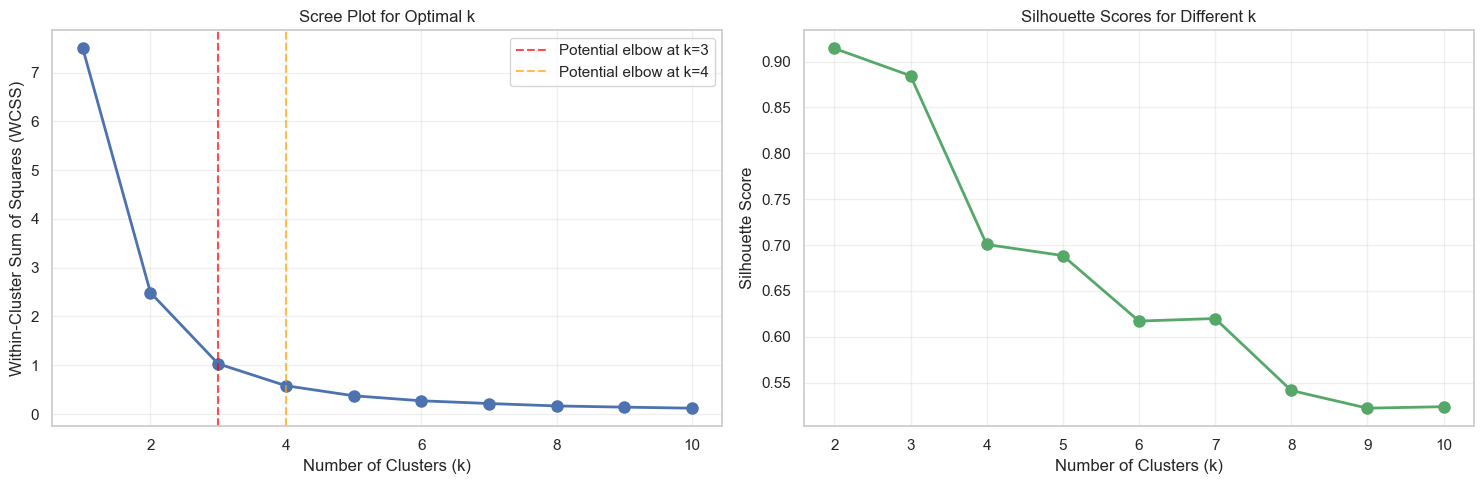

Chosen number of clusters: 4
Silhouette score: 0.701


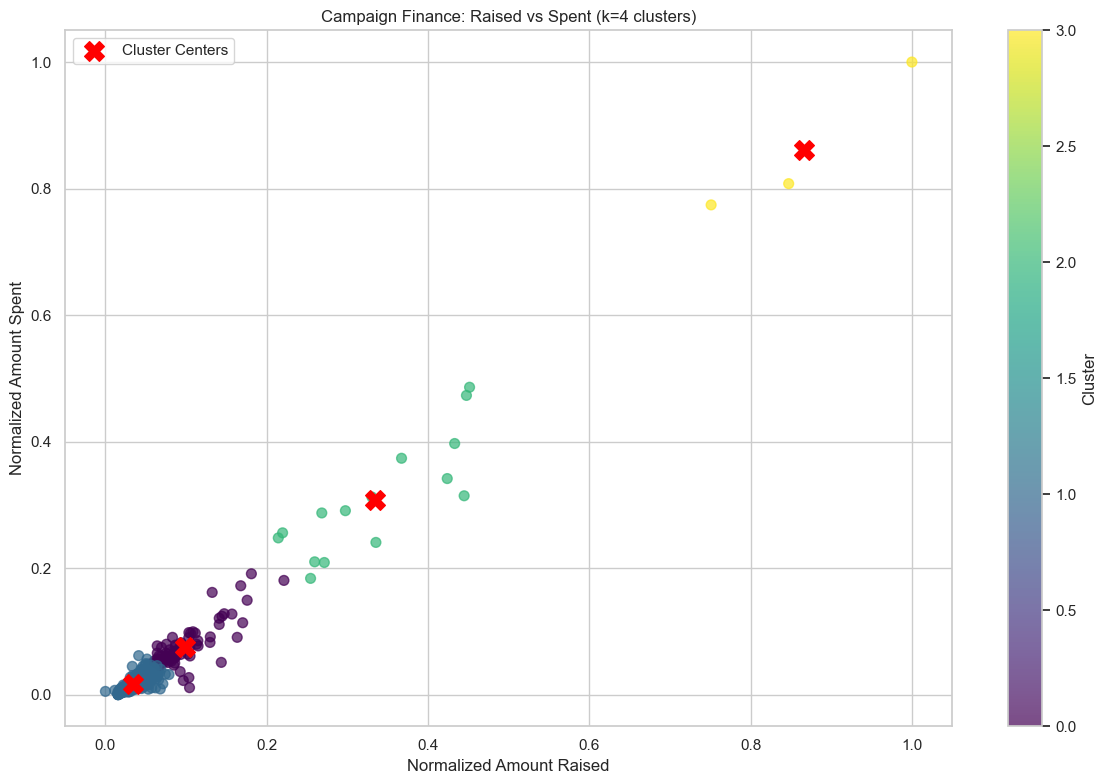


CLUSTER ANALYSIS
Cluster sizes: {0: 77, 1: 442, 2: 15, 3: 3}
Smallest two clusters: [3, 2]

--- Cluster 3 (Size: 3) ---
Average Raised: $74,801,746
Average Spent: $65,374,585

Politicians in this cluster:
  Mark Kelly (Democratic, Arizona Senate) - Raised: $73,140,886, Spent: $61,357,281
  Raphael Warnock (Democratic, Georgia Senate) - Raised: $86,581,469, Spent: $75,959,810
  Val Demings (Democratic, Florida House) - Raised: $64,682,883, Spent: $58,806,664

--- Cluster 2 (Size: 15) ---
Average Raised: $28,049,406
Average Spent: $23,407,963

Politicians in this cluster:
  Adam Schiff (Democratic, California House) - Raised: $20,993,041, Spent: $13,957,854
  Catherine Cortez Masto (Democratic, Nevada Senate) - Raised: $37,993,811, Spent: $35,928,936
  Chuck Schumer (Democratic, New York Senate) - Raised: $35,899,966, Spent: $25,944,350
  John Kennedy (Republican, Louisiana Senate) - Raised: $28,119,082, Spent: $18,276,565
  Katie Porter (Democratic, California House) - Raised: $21,441,

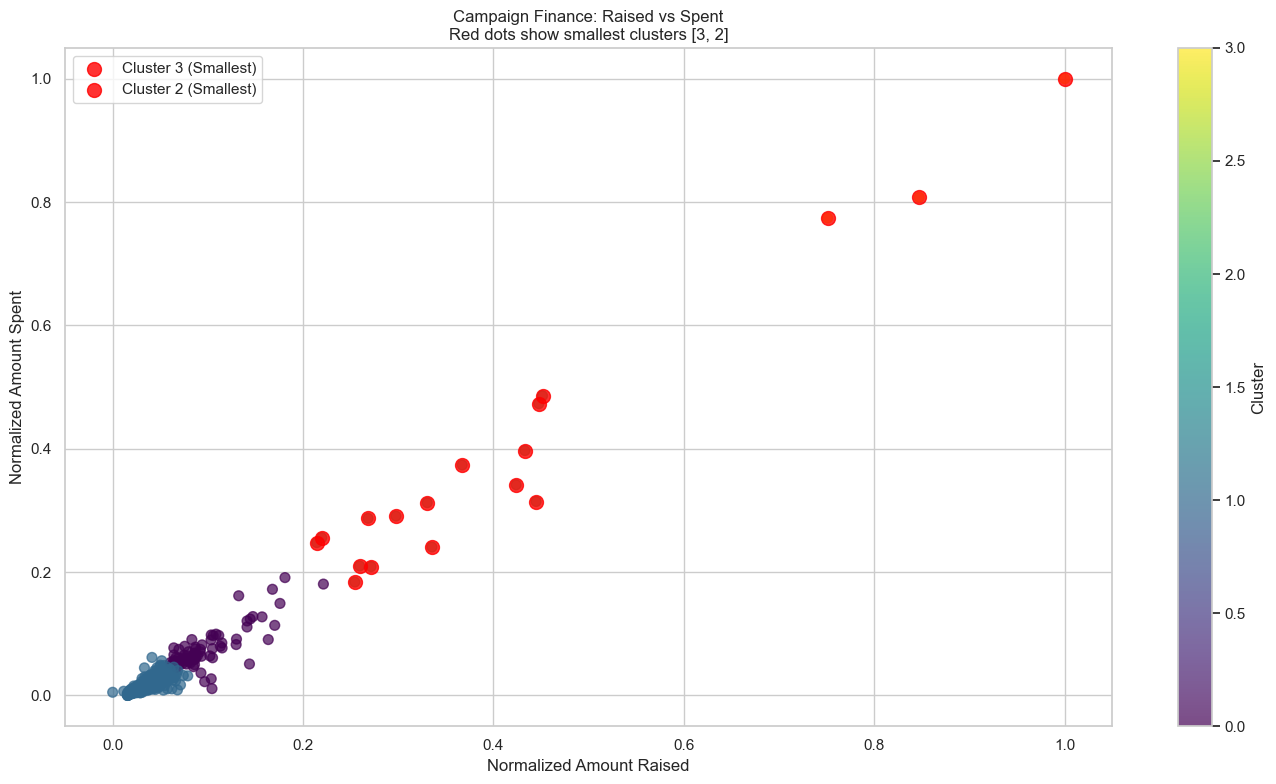

In [8]:
# Question 2.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming we already have the cleaned dataframe df_money
# If not, let's recreate the cleaning steps first
def clean_dollar_amount(series):
    cleaned = series.astype(str)
    cleaned = cleaned.str.replace('$', '', regex=False)
    cleaned = cleaned.str.replace(',', '', regex=False)
    cleaned = pd.to_numeric(cleaned, errors='coerce')
    return cleaned

# Clean the financial columns
financial_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df_money = df.copy()
for col in financial_cols:
    df_money[f'{col}_clean'] = clean_dollar_amount(df_money[col])

# Drop rows where all four money fields are missing
money_columns_clean = [f'{col}_clean' for col in financial_cols]
df_money = df_money.dropna(subset=money_columns_clean, how='all')

print(f"Data shape after cleaning: {df_money.shape}")

# Step 1: Max-min normalize Raised and Spent
scaler = MinMaxScaler()
features_to_normalize = ['Raised_clean', 'Spent_clean']
df_money[['Raised_norm', 'Spent_norm']] = scaler.fit_transform(df_money[features_to_normalize])

print("Normalization completed:")
print(df_money[['Raised_clean', 'Raised_norm', 'Spent_clean', 'Spent_norm']].head())

# Step 2: Create scree plot to determine optimal number of clusters
X = df_money[['Raised_norm', 'Spent_norm']].dropna()

# Calculate WCSS for different k values
wcss = []
silhouette_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score for k > 1
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

# Create scree plot
plt.figure(figsize=(15, 5))

# WCSS Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plot for Optimal k')
plt.grid(True, alpha=0.3)

# Mark potential elbows
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Potential elbow at k=3')
plt.axvline(x=4, color='orange', linestyle='--', alpha=0.7, label='Potential elbow at k=4')
plt.legend()

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 3: Based on scree plot, choose optimal k and perform clustering
optimal_k = 4  # Adjust based on scree plot analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_money['cluster'] = kmeans.fit_predict(X)

print(f"Chosen number of clusters: {optimal_k}")
print(f"Silhouette score: {silhouette_score(X, df_money['cluster']):.3f}")

# Step 4: Create scatter plot colored by cluster membership
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_money['Raised_norm'], df_money['Spent_norm'], 
                     c=df_money['cluster'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Normalized Amount Raised')
plt.ylabel('Normalized Amount Spent')
plt.title(f'Campaign Finance: Raised vs Spent (k={optimal_k} clusters)')

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Analyze the clusters - particularly the smallest two
print("\n" + "="*60)
print("CLUSTER ANALYSIS")
print("="*60)

cluster_counts = df_money['cluster'].value_counts().sort_index()
print(f"Cluster sizes: {cluster_counts.to_dict()}")

# Identify the smallest two clusters
smallest_clusters = cluster_counts.nsmallest(2).index.tolist()
print(f"Smallest two clusters: {smallest_clusters}")

# Analyze politicians in the smallest clusters
for cluster_id in smallest_clusters:
    cluster_data = df_money[df_money['cluster'] == cluster_id]
    print(f"\n--- Cluster {cluster_id} (Size: {len(cluster_data)}) ---")
    
    # Basic statistics for this cluster
    print(f"Average Raised: ${cluster_data['Raised_clean'].mean():,.0f}")
    print(f"Average Spent: ${cluster_data['Spent_clean'].mean():,.0f}")
    
    # Show top politicians in this cluster
    print("\nPoliticians in this cluster:")
    for _, row in cluster_data[['Member', 'Party', 'State', 'Chamber', 'Raised_clean', 'Spent_clean']].head(10).iterrows():
        print(f"  {row['Member']} ({row['Party']}, {row['State']} {row['Chamber']}) - Raised: ${row['Raised_clean']:,.0f}, Spent: ${row['Spent_clean']:,.0f}")

# Step 6: Detailed analysis of all clusters
print("\n" + "="*60)
print("DETAILED CLUSTER PROFILES")
print("="*60)

for cluster_id in sorted(df_money['cluster'].unique()):
    cluster_data = df_money[df_money['cluster'] == cluster_id]
    
    print(f"\nCluster {cluster_id} (n={len(cluster_data)}):")
    print(f"  Raised: ${cluster_data['Raised_clean'].mean():,.0f} avg, ${cluster_data['Raised_clean'].median():,.0f} median")
    print(f"  Spent:  ${cluster_data['Spent_clean'].mean():,.0f} avg, ${cluster_data['Spent_clean'].median():,.0f} median")
    print(f"  Party distribution: {cluster_data['Party'].value_counts().to_dict()}")
    print(f"  Chamber distribution: {cluster_data['Chamber'].value_counts().to_dict()}")

# Additional: Create a more informative scatter plot with party information
plt.figure(figsize=(14, 8))

# Plot with both cluster and party information
scatter = plt.scatter(df_money['Raised_norm'], df_money['Spent_norm'], 
                     c=df_money['cluster'], cmap='viridis', alpha=0.7, s=50)

# Highlight the smallest clusters
for cluster_id in smallest_clusters:
    cluster_data = df_money[df_money['cluster'] == cluster_id]
    plt.scatter(cluster_data['Raised_norm'], cluster_data['Spent_norm'], 
               c='red', s=100, alpha=0.8, label=f'Cluster {cluster_id} (Smallest)')

plt.colorbar(scatter, label='Cluster')
plt.xlabel('Normalized Amount Raised')
plt.ylabel('Normalized Amount Spent')
plt.title(f'Campaign Finance: Raised vs Spent\nRed dots show smallest clusters {smallest_clusters}')
plt.legend()
plt.tight_layout()
plt.show()

Question 2.2

The k=4 clustering revealed two distinct small clusters of elite fundraisers. The smallest cluster (3 politicians) included Senate candidates Mark Kelly and Raphael Warnock, plus House candidate Val Demings, who raised and spent extraordinary sums averaging 75 million dollar. The next smallest cluster contained 15 high-profile fundraisers like Adam Schiff and Chuck Schumer, who operated at an elevated financial tier. These clusters represent outliers in campaign financing, consisting of politicians in highly competitive races requiring massive war chests.

ANALYSIS FOR CASH ON HAND AND DEBTS
Normalization completed for Cash on Hand and Debts:
   Cash on Hand_clean  Cash_norm  Debts_clean  Debts_norm
0              851851   0.040154            0         0.0
1             2472888   0.111166            0         0.0
2            20942888   0.920268            0         0.0
3              623472   0.030150            0         0.0
4             1098579   0.050962            0         0.0


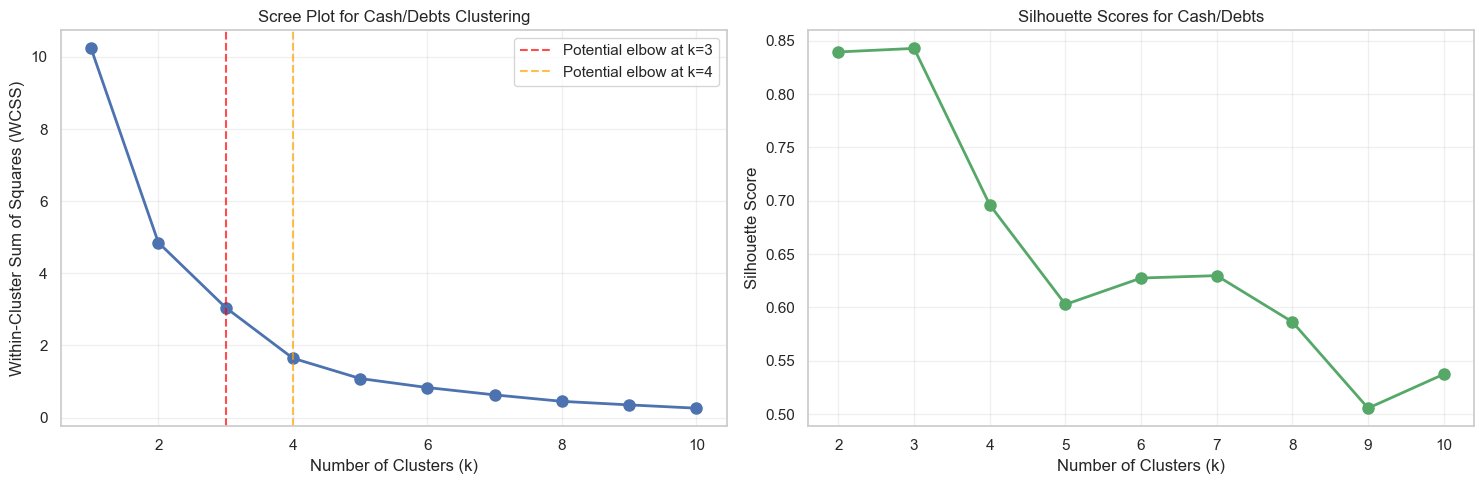

Chosen number of clusters for Cash/Debts: 4
Silhouette score: 0.696


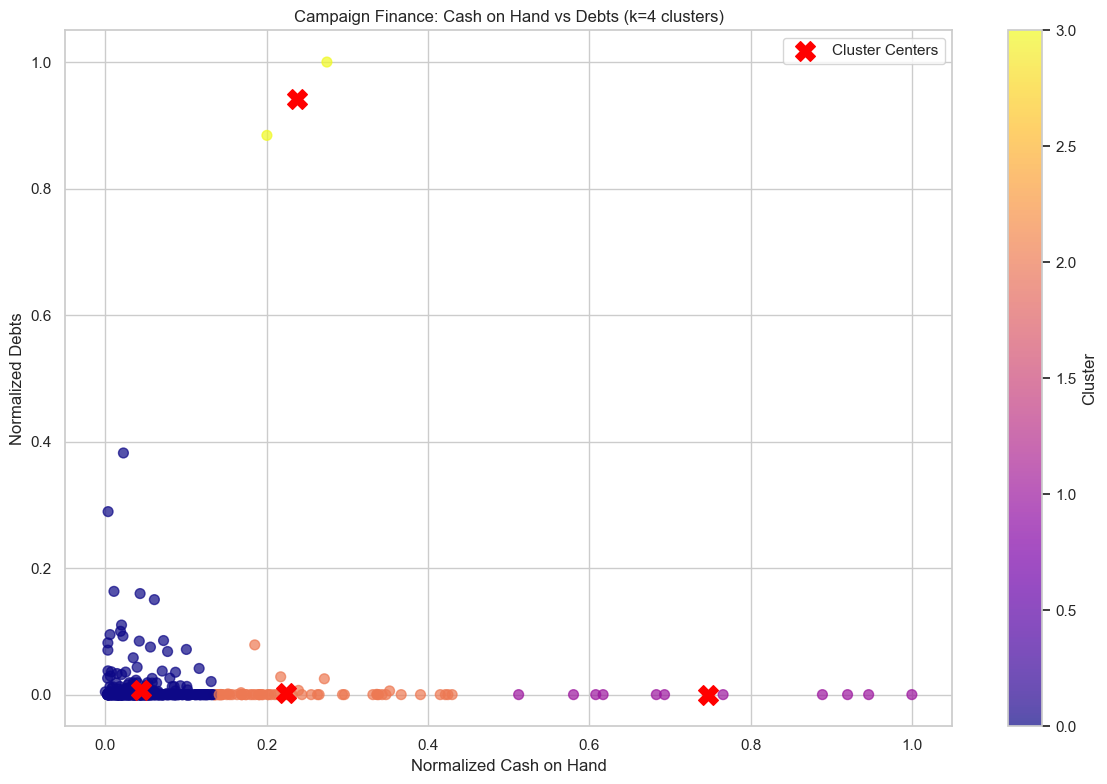


CASH/DEBTS CLUSTER ANALYSIS
Cluster sizes: {0: 460, 1: 11, 2: 64, 3: 2}
Smallest two clusters: [3, 1]

--- Cash/Debts Cluster 3 (Size: 2) ---
Average Cash: $5,357,476
Average Debts: $12,530,928

Politicians in this cluster:
  David Trone (Democratic, Maryland House) - Cash: $6,206,371, Debts: $13,302,000
  Ron Johnson (Republican, Wisconsin Senate) - Cash: $4,508,581, Debts: $11,759,857

--- Cash/Debts Cluster 1 (Size: 11) ---
Average Cash: $16,986,243
Average Debts: $0

Politicians in this cluster:
  Adam Schiff (Democratic, California House) - Cash: $20,942,888, Debts: $0
  Chuck Schumer (Democratic, New York Senate) - Cash: $20,231,213, Debts: $0
  John Kennedy (Republican, Louisiana Senate) - Cash: $15,530,074, Debts: $0
  John Thune (Republican, South Dakota Senate) - Cash: $17,419,927, Debts: $0
  Josh Gottheimer (Democratic, New Jersey House) - Cash: $14,024,163, Debts: $0
  Katie Porter (Democratic, California House) - Cash: $15,762,568, Debts: $0
  Lindsey Graham (Republican,

In [9]:
# Question 2.3

# Repeat analysis for Cash on Hand and Debts
print("="*60)
print("ANALYSIS FOR CASH ON HAND AND DEBTS")
print("="*60)

# Step 1: Max-min normalize Cash on Hand and Debts
scaler_cash_debts = MinMaxScaler()
features_to_normalize_2 = ['Cash on Hand_clean', 'Debts_clean']
df_money[['Cash_norm', 'Debts_norm']] = scaler_cash_debts.fit_transform(df_money[features_to_normalize_2])

print("Normalization completed for Cash on Hand and Debts:")
print(df_money[['Cash on Hand_clean', 'Cash_norm', 'Debts_clean', 'Debts_norm']].head())

# Step 2: Create scree plot for Cash/Debts clustering
X_cash_debts = df_money[['Cash_norm', 'Debts_norm']].dropna()

# Calculate WCSS for different k values
wcss_cash_debts = []
silhouette_scores_cash_debts = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cash_debts)
    wcss_cash_debts.append(kmeans.inertia_)
    
    if k > 1:
        score = silhouette_score(X_cash_debts, kmeans.labels_)
        silhouette_scores_cash_debts.append(score)

# Create scree plot for Cash/Debts
plt.figure(figsize=(15, 5))

# WCSS Plot
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_cash_debts, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plot for Cash/Debts Clustering')
plt.grid(True, alpha=0.3)

# Mark potential elbows
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Potential elbow at k=3')
plt.axvline(x=4, color='orange', linestyle='--', alpha=0.7, label='Potential elbow at k=4')
plt.legend()

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_cash_debts, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Cash/Debts')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 3: Choose optimal k and perform clustering for Cash/Debts
optimal_k_cash_debts = 4  # Adjust based on scree plot analysis
kmeans_cash_debts = KMeans(n_clusters=optimal_k_cash_debts, random_state=42, n_init=10)
df_money['cluster_cash_debts'] = kmeans_cash_debts.fit_predict(X_cash_debts)

print(f"Chosen number of clusters for Cash/Debts: {optimal_k_cash_debts}")
print(f"Silhouette score: {silhouette_score(X_cash_debts, df_money['cluster_cash_debts']):.3f}")

# Step 4: Create scatter plot for Cash vs Debts colored by cluster membership
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_money['Cash_norm'], df_money['Debts_norm'], 
                     c=df_money['cluster_cash_debts'], cmap='plasma', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Normalized Cash on Hand')
plt.ylabel('Normalized Debts')
plt.title(f'Campaign Finance: Cash on Hand vs Debts (k={optimal_k_cash_debts} clusters)')

# Add cluster centers
centers_cash_debts = kmeans_cash_debts.cluster_centers_
plt.scatter(centers_cash_debts[:, 0], centers_cash_debts[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Analyze the clusters for Cash/Debts
print("\n" + "="*60)
print("CASH/DEBTS CLUSTER ANALYSIS")
print("="*60)

cluster_counts_cash_debts = df_money['cluster_cash_debts'].value_counts().sort_index()
print(f"Cluster sizes: {cluster_counts_cash_debts.to_dict()}")

# Identify the smallest two clusters
smallest_clusters_cash_debts = cluster_counts_cash_debts.nsmallest(2).index.tolist()
print(f"Smallest two clusters: {smallest_clusters_cash_debts}")

# Analyze politicians in the smallest clusters for Cash/Debts
for cluster_id in smallest_clusters_cash_debts:
    cluster_data = df_money[df_money['cluster_cash_debts'] == cluster_id]
    print(f"\n--- Cash/Debts Cluster {cluster_id} (Size: {len(cluster_data)}) ---")
    
    # Basic statistics for this cluster
    print(f"Average Cash: ${cluster_data['Cash on Hand_clean'].mean():,.0f}")
    print(f"Average Debts: ${cluster_data['Debts_clean'].mean():,.0f}")
    
    # Show politicians in this cluster
    print("\nPoliticians in this cluster:")
    for _, row in cluster_data[['Member', 'Party', 'State', 'Chamber', 'Cash on Hand_clean', 'Debts_clean']].head(10).iterrows():
        print(f"  {row['Member']} ({row['Party']}, {row['State']} {row['Chamber']}) - Cash: ${row['Cash on Hand_clean']:,.0f}, Debts: ${row['Debts_clean']:,.0f}")

# Step 6: Compare with previous Raised/Spent analysis
print("\n" + "="*60)
print("COMPARISON: RAISED/SPENT vs CASH/DEBTS")
print("="*60)

print("Raised/Spent Clusters:")
print(f"  Optimal k: {optimal_k}")
print(f"  Silhouette: {silhouette_score(X, df_money['cluster']):.3f}")
print(f"  Cluster sizes: {cluster_counts.to_dict()}")
print(f"  Smallest clusters: {smallest_clusters}")

print("\nCash/Debts Clusters:")
print(f"  Optimal k: {optimal_k_cash_debts}")
print(f"  Silhouette: {silhouette_score(X_cash_debts, df_money['cluster_cash_debts']):.3f}")
print(f"  Cluster sizes: {cluster_counts_cash_debts.to_dict()}")
print(f"  Smallest clusters: {smallest_clusters_cash_debts}")

# Step 7: Cross-tabulation to see how clusters relate
print("\n" + "="*60)
print("CLUSTER RELATIONSHIP ANALYSIS")
print("="*60)

cross_tab = pd.crosstab(df_money['cluster'], df_money['cluster_cash_debts'])
print("Cross-tabulation of Raised/Spent vs Cash/Debts clusters:")
print(cross_tab)

# Step 8: Identify politicians who appear in smallest clusters in both analyses
print("\n" + "="*60)
print("POLITICIANS IN SMALLEST CLUSTERS IN BOTH ANALYSES")
print("="*60)

smallest_both_analyses = df_money[
    (df_money['cluster'].isin(smallest_clusters)) & 
    (df_money['cluster_cash_debts'].isin(smallest_clusters_cash_debts))
]

print(f"Politicians in smallest clusters for both analyses: {len(smallest_both_analyses)}")
for _, row in smallest_both_analyses.iterrows():
    print(f"  {row['Member']} - Raised/Spent Cluster: {row['cluster']}, Cash/Debts Cluster: {row['cluster_cash_debts']}")

# Additional analysis: Look at debt patterns
print("\n" + "="*60)
print("DEBT ANALYSIS")
print("="*60)

debt_stats = df_money['Debts_clean'].describe()
print(f"Debt statistics:\n{debt_stats}")

# Count politicians with significant debt
significant_debt = df_money[df_money['Debts_clean'] > 100000]  # More than $100,000 in debt
print(f"\nPoliticians with >$100,000 debt: {len(significant_debt)}")
if len(significant_debt) > 0:
    for _, row in significant_debt.head(10).iterrows():
        print(f"  {row['Member']}: ${row['Debts_clean']:,.0f}")

Question 2.3

The Cash/Debts clustering shows different patterns than Raised/Spent. The smallest clusters reveal financial extremes: David Trone and Ron Johnson carried massive debts over 11 million dollar, while politicians like Adam Schiff and Chuck Schumer held huge cash reserves (17 million dollar average) with zero debt. Most candidates had minimal debt, making these high-debt and massive-cash positions rare and financially distinctive.

CLUSTERING WITH ALL FOUR VARIABLES
Using all four features: ['Raised_norm', 'Spent_norm', 'Cash_norm', 'Debts_norm']
Data shape for clustering: (537, 4)


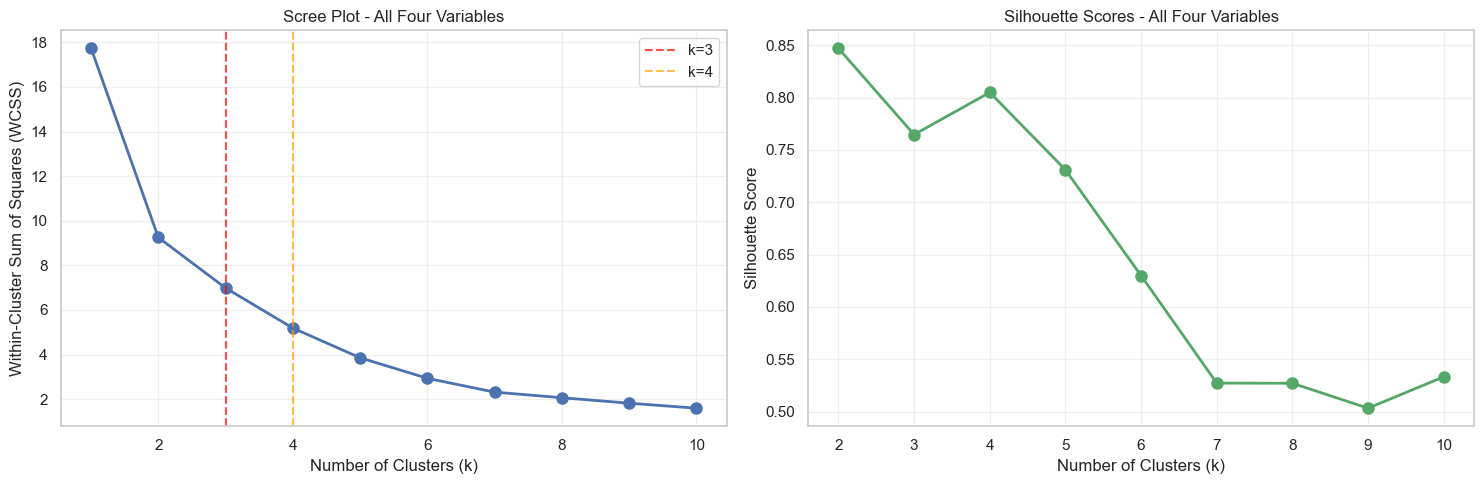

Optimal k for all variables: 4
Silhouette score: 0.805

ALL FOUR VARIABLES CLUSTER ANALYSIS
Cluster sizes: {0: 502, 1: 30, 2: 2, 3: 3}
Smallest clusters: [2, 3]

--- All-Variables Cluster 2 (Size: 2) ---
Average Raised: $20,335,821
Average Spent: $15,304,852
Average Cash: $5,357,476
Average Debts: $12,530,928

Top politicians:
  David Trone - Raised: $12,990,741, Cash: $6,206,371, Debts: $13,302,000
  Ron Johnson - Raised: $27,680,901, Cash: $4,508,581, Debts: $11,759,857

--- All-Variables Cluster 3 (Size: 3) ---
Average Raised: $74,801,746
Average Spent: $65,374,585
Average Cash: $14,198,918
Average Debts: $0

Top politicians:
  Mark Kelly - Raised: $73,140,886, Cash: $13,186,127, Debts: $0
  Raphael Warnock - Raised: $86,581,469, Cash: $22,762,985, Debts: $0
  Val Demings - Raised: $64,682,883, Cash: $6,647,641, Debts: $0

COMPARISON ACROSS ALL THREE APPROACHES
Raised/Spent Analysis:
  Clusters: {0: 77, 1: 442, 2: 15, 3: 3}
  Smallest: [3, 2]

Cash/Debts Analysis:
  Clusters: {0: 46

In [10]:
# Question 2.4

print("="*60)
print("CLUSTERING WITH ALL FOUR VARIABLES")
print("="*60)

# Step 1: Prepare all four normalized variables
all_features = ['Raised_norm', 'Spent_norm', 'Cash_norm', 'Debts_norm']
X_all = df_money[all_features].dropna()

print(f"Using all four features: {all_features}")
print(f"Data shape for clustering: {X_all.shape}")

# Step 2: Create scree plot for all four variables
wcss_all = []
silhouette_scores_all = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_all)
    wcss_all.append(kmeans.inertia_)
    
    if k > 1:
        score = silhouette_score(X_all, kmeans.labels_)
        silhouette_scores_all.append(score)

# Create scree plot for all features
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_all, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plot - All Four Variables')
plt.grid(True, alpha=0.3)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3')
plt.axvline(x=4, color='orange', linestyle='--', alpha=0.7, label='k=4')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_all, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores - All Four Variables')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 3: Perform clustering with optimal k
optimal_k_all = 4
kmeans_all = KMeans(n_clusters=optimal_k_all, random_state=42, n_init=10)
df_money['cluster_all'] = kmeans_all.fit_predict(X_all)

print(f"Optimal k for all variables: {optimal_k_all}")
print(f"Silhouette score: {silhouette_score(X_all, df_money['cluster_all']):.3f}")

# Step 4: Analyze clusters
print("\n" + "="*60)
print("ALL FOUR VARIABLES CLUSTER ANALYSIS")
print("="*60)

cluster_counts_all = df_money['cluster_all'].value_counts().sort_index()
print(f"Cluster sizes: {cluster_counts_all.to_dict()}")
smallest_clusters_all = cluster_counts_all.nsmallest(2).index.tolist()
print(f"Smallest clusters: {smallest_clusters_all}")

# Analyze the smallest clusters
for cluster_id in smallest_clusters_all:
    cluster_data = df_money[df_money['cluster_all'] == cluster_id]
    print(f"\n--- All-Variables Cluster {cluster_id} (Size: {len(cluster_data)}) ---")
    print(f"Average Raised: ${cluster_data['Raised_clean'].mean():,.0f}")
    print(f"Average Spent: ${cluster_data['Spent_clean'].mean():,.0f}")
    print(f"Average Cash: ${cluster_data['Cash on Hand_clean'].mean():,.0f}")
    print(f"Average Debts: ${cluster_data['Debts_clean'].mean():,.0f}")
    
    print("\nTop politicians:")
    for _, row in cluster_data.head(8).iterrows():
        print(f"  {row['Member']} - Raised: ${row['Raised_clean']:,.0f}, "
              f"Cash: ${row['Cash on Hand_clean']:,.0f}, "
              f"Debts: ${row['Debts_clean']:,.0f}")

# Step 5: Compare with previous analyses
print("\n" + "="*60)
print("COMPARISON ACROSS ALL THREE APPROACHES")
print("="*60)

print("Raised/Spent Analysis:")
print(f"  Clusters: {dict(cluster_counts)}")
print(f"  Smallest: {smallest_clusters}")

print("\nCash/Debts Analysis:")
print(f"  Clusters: {dict(cluster_counts_cash_debts)}")
print(f"  Smallest: {smallest_clusters_cash_debts}")

print("\nAll Four Variables:")
print(f"  Clusters: {dict(cluster_counts_all)}")
print(f"  Smallest: {smallest_clusters_all}")

# Step 6: Cross-analysis to see overlap
print("\n" + "="*60)
print("OVERLAP ANALYSIS")
print("="*60)

# Check which politicians appear in smallest clusters across multiple analyses
print("Politicians in smallest clusters across analyses:")
overlap_count = 0
for _, row in df_money.iterrows():
    in_smallest_raised = row['cluster'] in smallest_clusters
    in_smallest_cash = row['cluster_cash_debts'] in smallest_clusters_cash_debts
    in_smallest_all = row['cluster_all'] in smallest_clusters_all
    
    if in_smallest_raised + in_smallest_cash + in_smallest_all >= 2:
        print(f"  {row['Member']}: Raised/Spent Cluster {row['cluster']}, "
              f"Cash/Debts Cluster {row['cluster_cash_debts']}, "
              f"All-Vars Cluster {row['cluster_all']}")
        overlap_count += 1

print(f"\nTotal politicians in multiple smallest clusters: {overlap_count}")

# Step 7: Create pairplot to visualize all four dimensions
print("\n" + "="*60)
print("MULTI-DIMENSIONAL CLUSTER PROFILES")
print("="*60)

for cluster_id in sorted(df_money['cluster_all'].unique()):
    cluster_data = df_money[df_money['cluster_all'] == cluster_id]
    print(f"\nAll-Vars Cluster {cluster_id} (n={len(cluster_data)}):")
    print(f"  Raised: ${cluster_data['Raised_clean'].mean():,.0f}")
    print(f"  Spent: ${cluster_data['Spent_clean'].mean():,.0f}")
    print(f"  Cash: ${cluster_data['Cash on Hand_clean'].mean():,.0f}")
    print(f"  Debts: ${cluster_data['Debts_clean'].mean():,.0f}")
    print(f"  Party: {cluster_data['Party'].value_counts().to_dict()}")

Question 2.4

The four-variable clustering achieves the clearest separation (silhouette: 0.805) and reveals two distinct outlier groups: mega-fundraisers with zero debt (Kelly, Warnock, Demings) and moderate fundraisers with massive debt (Trone, Johnson). This combined analysis distinguishes financial patterns that the two-variable approaches could not separate, showing that extreme campaign finance profiles involve specific combinations of all four metrics.

Question 2.5

Yes, the k-means algorithm revealed several useful patterns in the election finance data. It successfully identified distinct fundraising tiers, separating typical candidates from elite fundraisers and exposing extreme financial outliers. The clustering highlighted politicians operating at unprecedented financial scales, like the three candidates raising over 74 million dollar, and exposed risky financial strategies, particularly the two candidates carrying massive debt exceeding 11 million dollar. These patterns provided meaningful insights into campaign strategy, financial health, and resource allocation across different races, demonstrating clear financial archetypes among 2022 election candidates.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?